# Step 1: Import libraries



In [354]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
from scipy import stats
import joblib

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load dataset

In [355]:
df = pd.read_excel('/content/drive/MyDrive/Upgrad/Data sets/Capstone/train.xlsx')

# Step 3: Exploratory Data Analysis

**3.1 Understand the Basic Structure**

In [356]:
# Reading the data with all the columns visible
pd.options.display.max_columns=None
df.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [357]:
df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

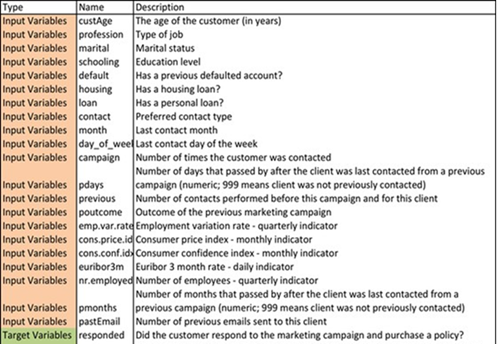

In [358]:
# Drop unwanted features based on image
df = df.drop(columns=['profit','id'], axis = 1)

In [359]:
# Get the rows and columns of training data
df_shape = df.shape
print("Data shape:", df_shape)

Data shape: (8240, 22)


In [360]:
# Get basic information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

**3.2 Summarize the Data**

In [361]:
# Statistic description of numerical columns
df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000





*   The maximum values observed in the 'pdays' and 'pmonths' columns appear to be the result of missing data.
*   These values will be appropriately encoded in the Data Cleaning process.





**3.3 Check for Duplicate values**

In [362]:
# Check for duplicates
df.duplicated().sum()

37

In [363]:
# Data have 37 duplicate records
print('Original Shape of Data: ',df.shape)

# Remove duplicates and resetting the index
df = df.drop_duplicates().reset_index(drop=True)
print('Shape of Data after removing duplicates: ',df.shape)

Original Shape of Data:  (8240, 22)
Shape of Data after removing duplicates:  (8203, 22)


**3.4 Check for Missing values**

In [364]:
# Checking null value count for each column
df.isnull().sum()

,0
custAge,2000
profession,1
marital,1
schooling,2394
default,1
housing,1
loan,1
contact,1
month,1
day_of_week,785


In [365]:
# Filtering the rows with null values in target column ('responded')
df[df['responded'].isnull()]

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
8202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   It was identified that a record contains null values in all columns including target column, hence this record will be removed.



In [366]:
# Removing the record containing null value in target column
df = df.dropna(subset=['responded'])

In [367]:
# Checking for null percentage for each column
round((df.isnull().sum() / len(df)) * 100,2)

,0
custAge,24.37
profession,0.00
marital,0.00
schooling,29.18
default,0.00
housing,0.00
loan,0.00
contact,0.00
month,0.00
day_of_week,9.56


**3.5
 Target Variable Analysis**

In [368]:
# Calculate value counts of Target column
df['responded'].value_counts()

,count
responded,
no,7274
yes,928


In [369]:
# Calculate percentage distribution of values in target column
round(df['responded'].value_counts(normalize=True) * 100,2)

,proportion
responded,
no,88.69
yes,11.31


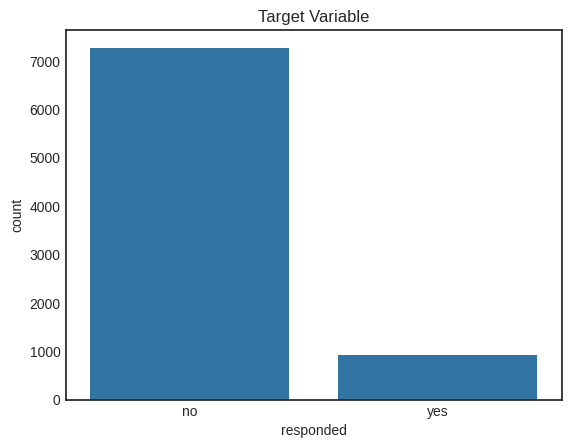

In [370]:
sns.countplot(df, x='responded')
plt.title("Target Variable")
plt.show()

The target variable in the dataset is heavily skewed, as around 88% of the customers did not engage with the marketing campaign, while only 11% responded. To ensure accurate model performance, it is vital to address this class imbalance prior to model development.

**3.6 Numerical Feature Analysis**

In [371]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'pmonths', 'pastEmail'],
      dtype='object')

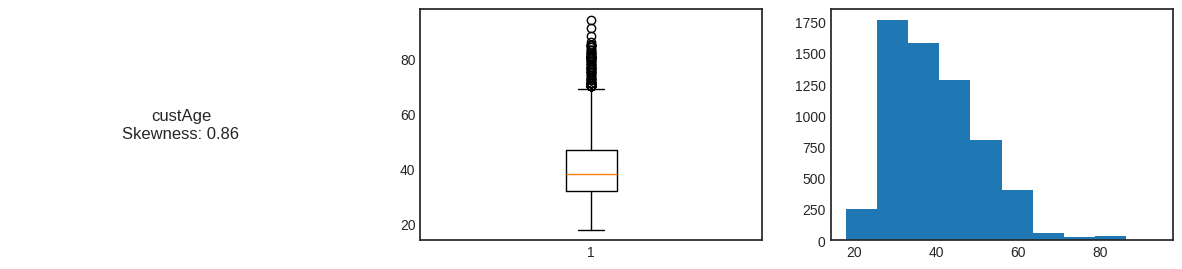

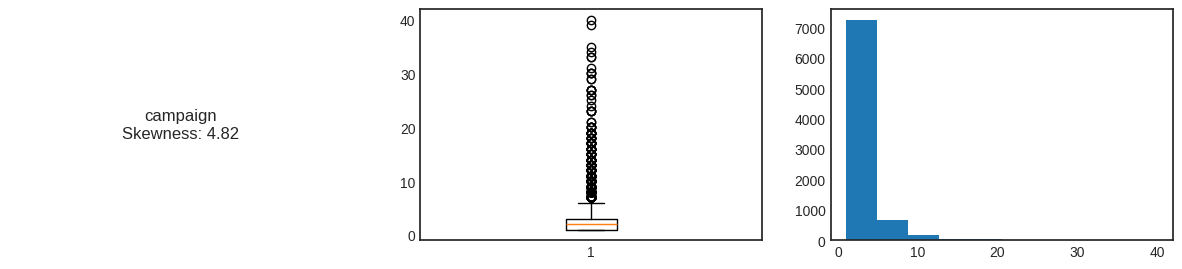

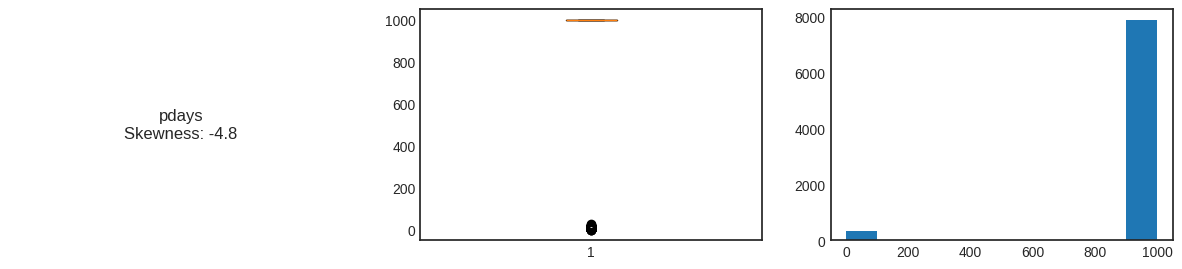

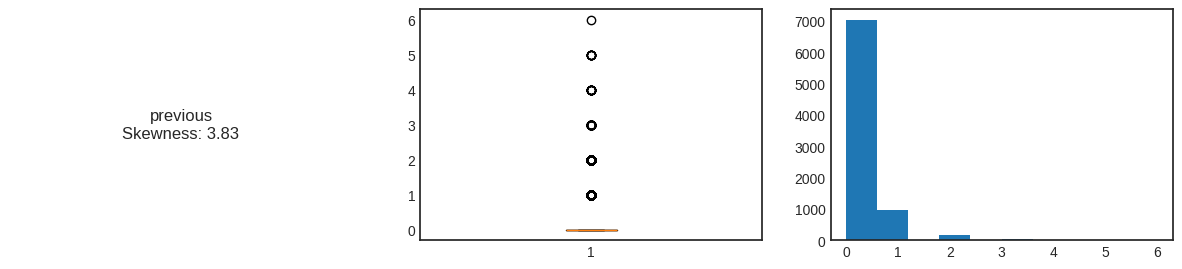

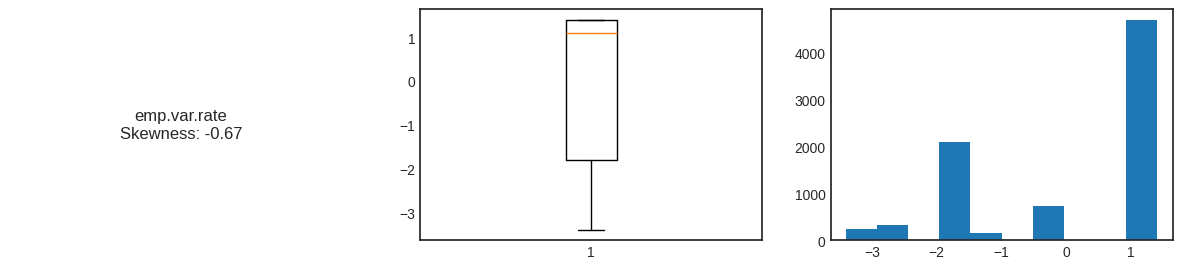

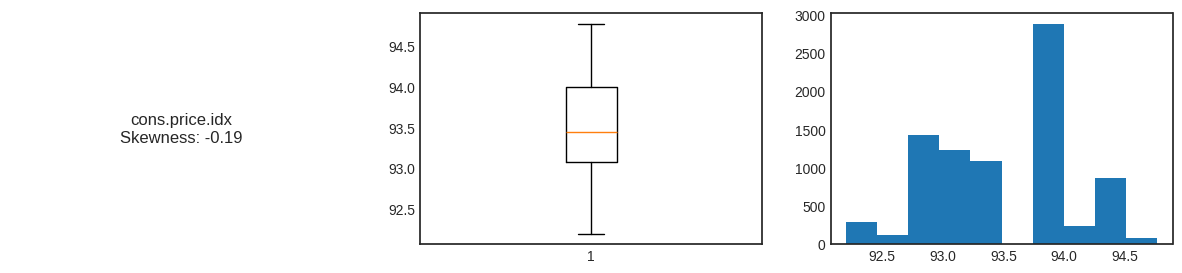

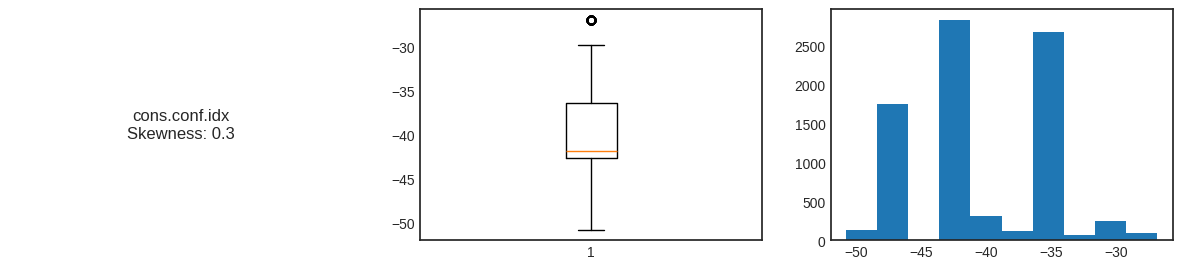

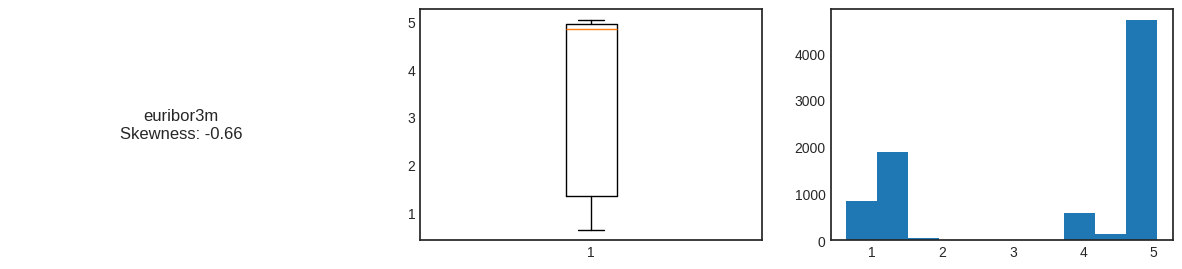

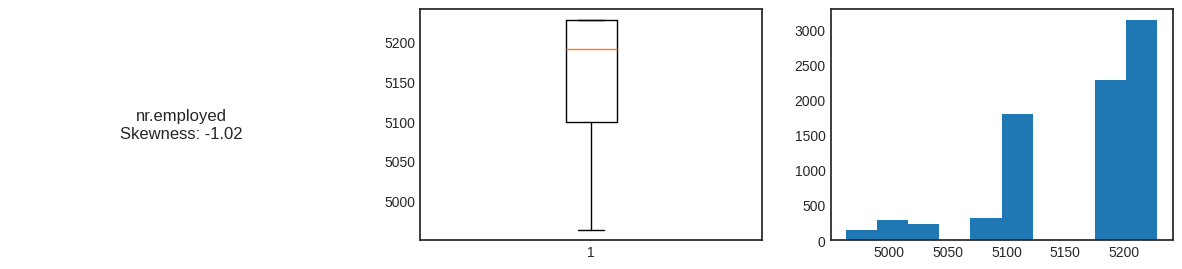

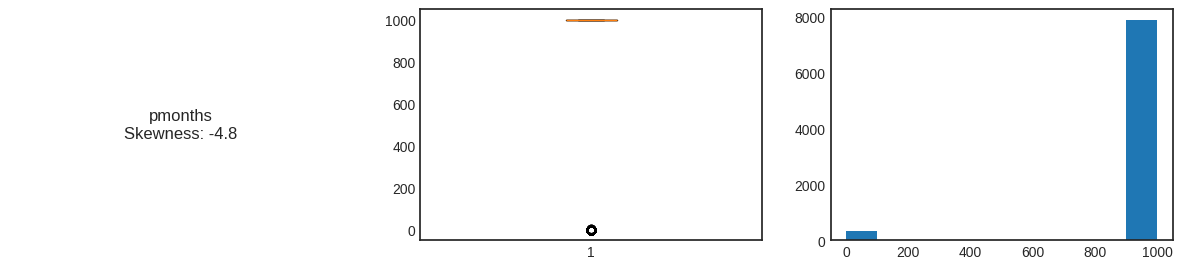

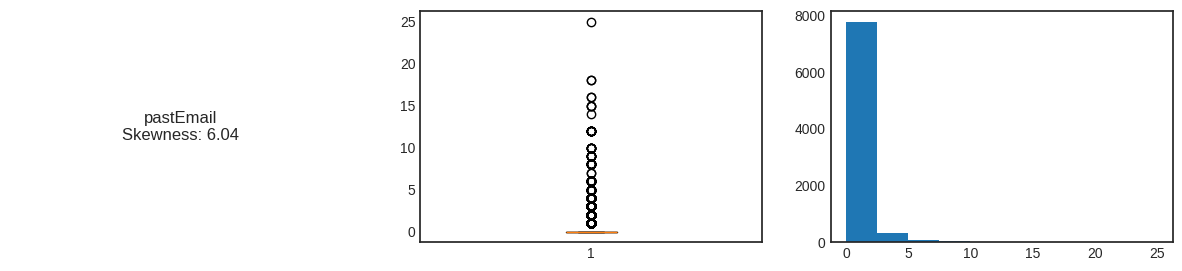

In [372]:
# Boxplot and Histogram for numerical columns
for col in num_cols:
  fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
  skewness = round(df[col].skew(),2)
  axes[0].text(0.5, 0.5, (f"{col}\nSkewness: {skewness}"), fontsize=12, ha='center', va='center')
  axes[0].axis('off')
  axes[1].boxplot(df[col].dropna())
  axes[2].hist(df[col])
  # axes[0].set_xlabel(col)
  plt.show()



*   From the above charts we can observe that custAge, campaign, previous and pastEmail columns are right skewed.
*   nr.employed column is left skewed.
*   pdays and pmonths column are to be treated after handling the missing values.



**3.7 Categorical Feature - Univariate Analysis**

In [373]:
cat_cols = df.drop(columns=num_cols, axis=1).columns
cat_cols

Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'responded'],
      dtype='object')

In [374]:
for column in cat_cols:
  print(df[column].value_counts())
  print('\n')

profession
admin.           2090
blue-collar      1842
technician       1340
services          790
management        580
retired           335
entrepreneur      314
self-employed     279
housemaid         213
unemployed        189
student           159
unknown            71
Name: count, dtype: int64


marital
married     4933
single      2329
divorced     930
unknown       10
Name: count, dtype: int64


schooling
university.degree      1716
high.school            1337
basic.9y                862
professional.course     736
basic.4y                585
basic.6y                312
unknown                 260
illiterate                1
Name: count, dtype: int64


default
no         6587
unknown    1614
yes           1
Name: count, dtype: int64


housing
yes        4281
no         3737
unknown     184
Name: count, dtype: int64


loan
no         6740
yes        1278
unknown     184
Name: count, dtype: int64


contact
cellular     5211
telephone    2991
Name: count, dtype: int64


month
may 

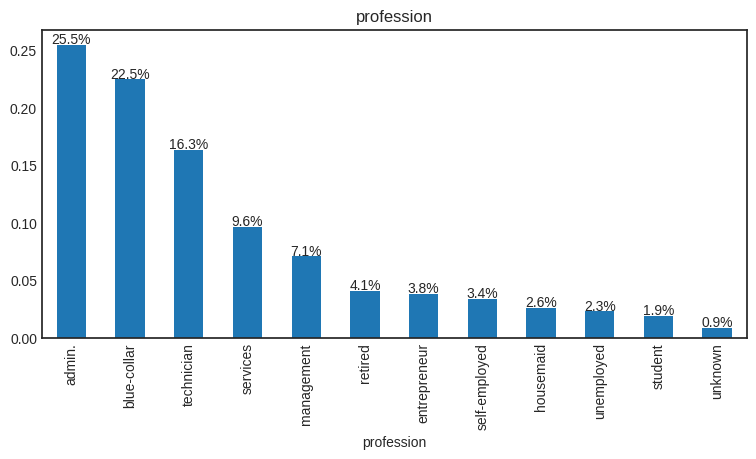

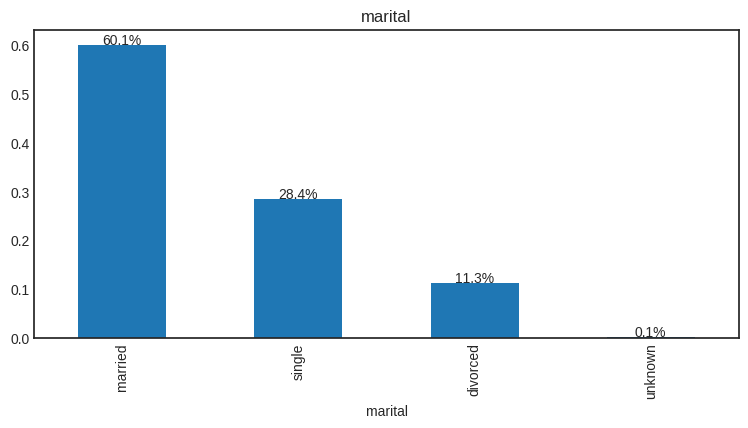

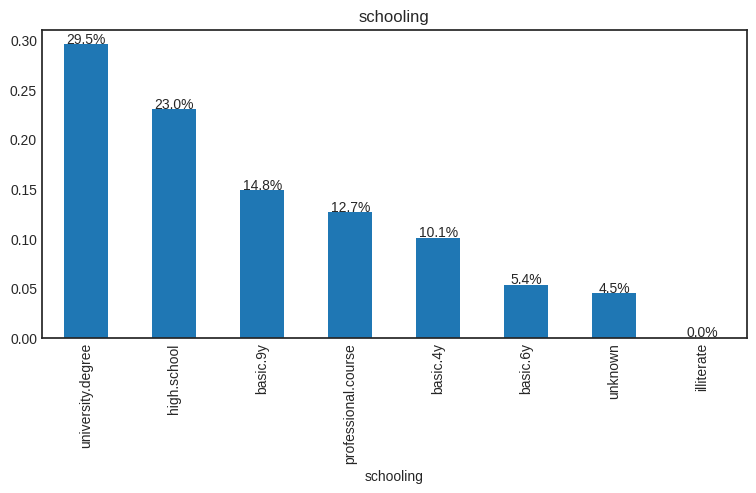

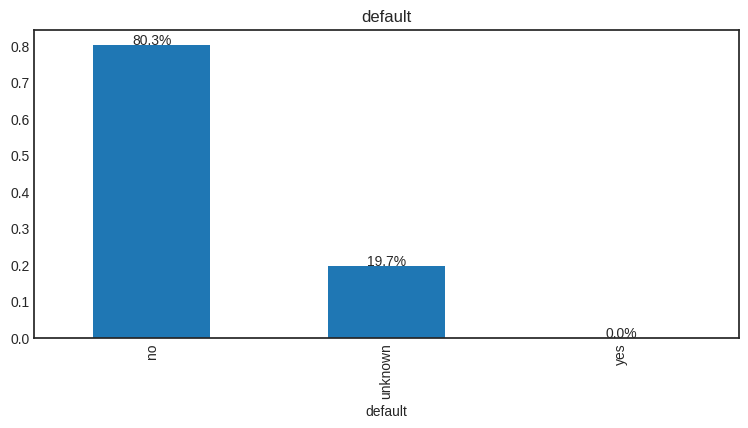

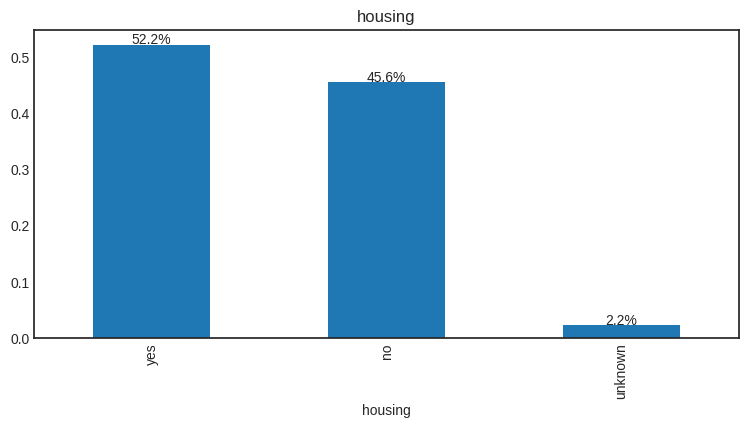

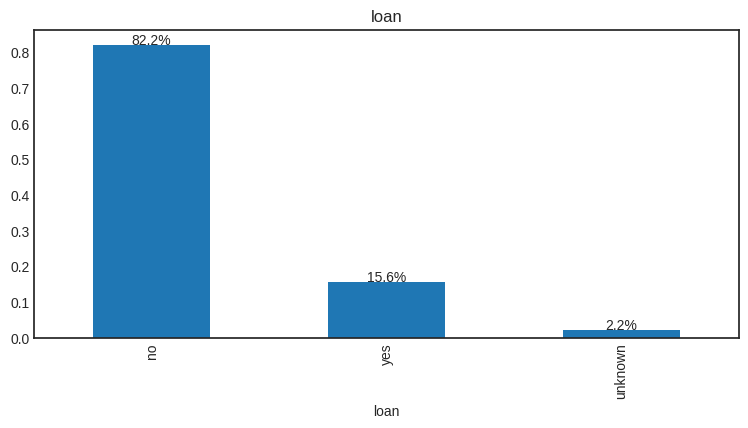

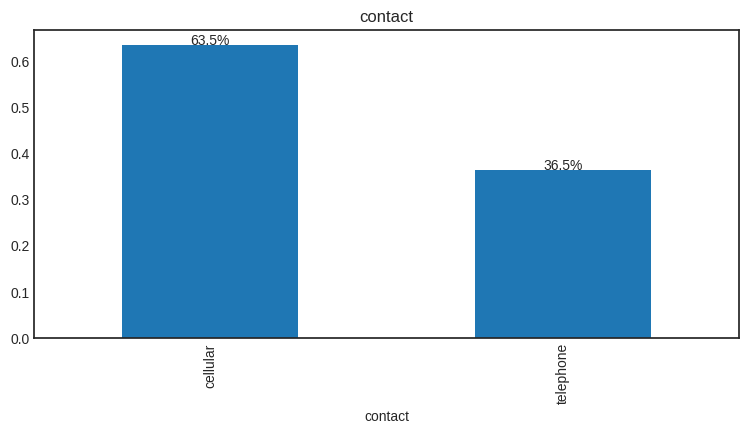

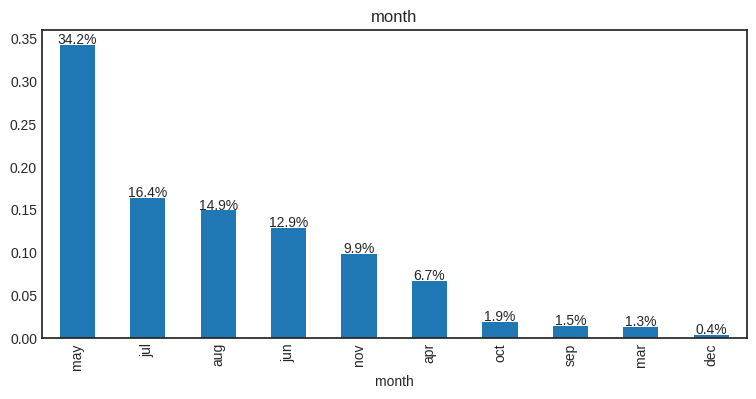

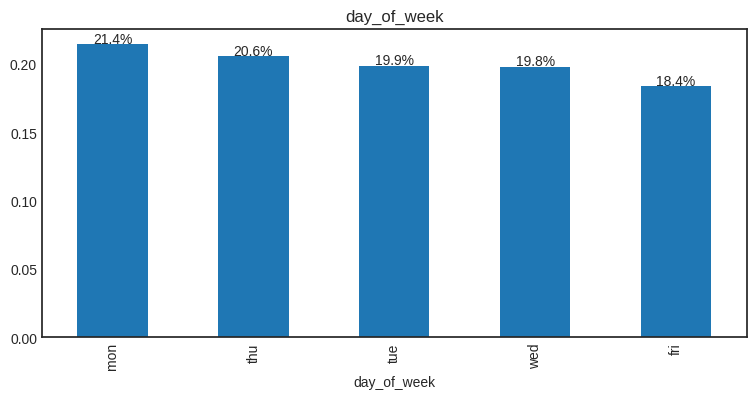

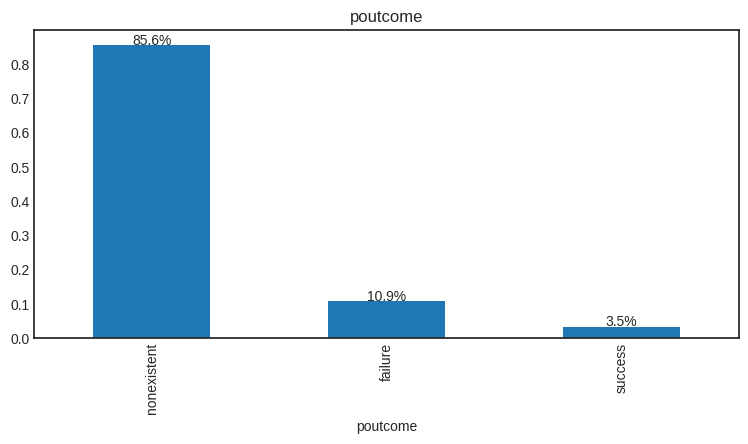

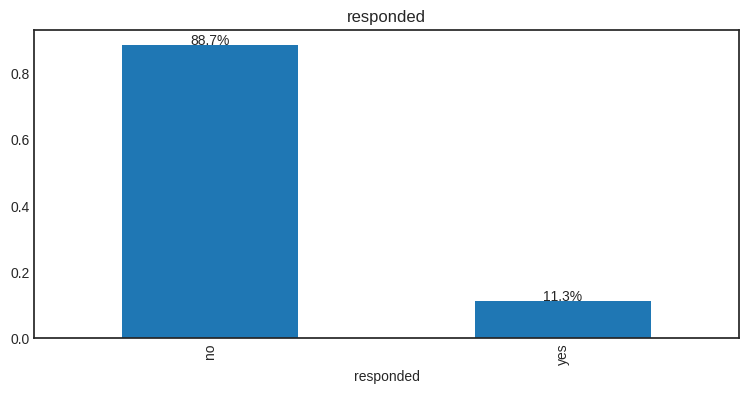

In [375]:
# # Bar plot for categorical columns
# for columns in cat_cols:
#   plt.figure(figsize=(12,3))
#   sns.countplot(x=columns, data=df)
#   plt.xlabel(columns)
#   plt.xticks(rotation=5)
#   plt.show()

# plotting bar chart for each categorical variable
plt.style.use('seaborn-v0_8-white')

for column in cat_cols:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind="bar")
    plt.title(column)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.001, f"{p.get_height()*100:.1f}%", ha="center")

# Step 4: Data Cleaning

**4.1 Data Aggregation**

Schooling


*   basic.4y, basic.6y, basic.9y education can be grouped as Primary Education
*   Since illiterate has only one record, grouping it into unknown section



In [376]:
df['schooling'] = df['schooling'].replace(['basic.4y', 'basic.6y', 'basic.9y'],'primary.education')
df['schooling'] = df['schooling'].replace('illiterate','unknown')

In [377]:
df['schooling'].value_counts()

,count
schooling,
primary.education,1759
university.degree,1716
high.school,1337
professional.course,736
unknown,261


**4.2 Handle Missing Data**

'custAge', 'schooling' have 25% of missing data and 'day of the week' has around 9% of missing data.


*   Customer age can affect responses to insurance marketing based on different life stages
*   Day of the Week affects availability for making decisions
*   Schooling reflects educational background, which may impact the likelihood of purchasing insurance.

Dropping these variables would result in a significant loss of information. Therefore, we will use different imputation methods to fill the missing values in these columns.



**4.2.1 Schooling**

The Schooling column may have an impact on an individual's profession, as education level often correlates with career choices. To address the missing values in the Schooling column, we will analyze the relationship between Schooling and Profession to identify patterns and use this relationship to impute the missing data effectively.

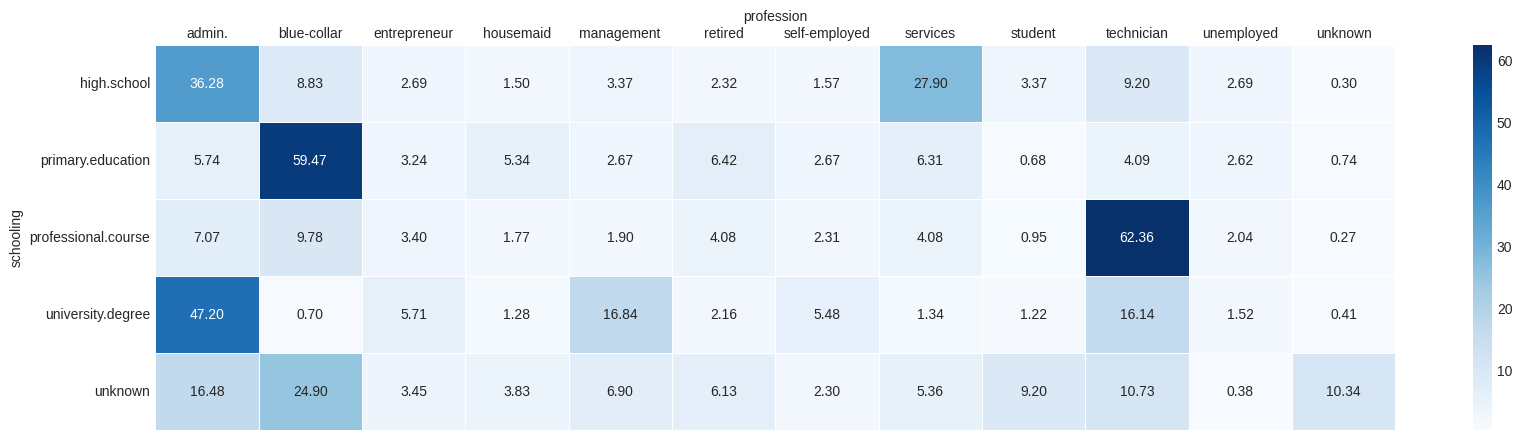

In [378]:
# Create a cross-tab for 'schooling' and 'profession'
cross_tab = pd.crosstab(df['schooling'], df['profession'],normalize = 'index')*100

# Set up the matplotlib figure
plt.figure(figsize=(20, 5))

# Create a heatmap for the cross-tabulation
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap='Blues', cbar=True, linewidths=0.5)
plt.gca().xaxis.set_label_position('top') # Moves the xlabel to the top
plt.gca().xaxis.set_ticks_position('top') # Moves the xticks to the top
plt.show()

Based on the analysis of the Schooling and Profession columns, we observe distinct patterns linking education levels to specific professions. To handle missing values in the Schooling column, we will impute them by associating education levels with their corresponding professions. Any remaining missing data will be categorized as "Unknown."

In [379]:
schooling_profession_mapping = {
    'technician': 'professional.course',
    'blue-collar': 'primary.education',
    'admin.': 'university.degree',
    'services': 'high.school'
}

# Function to impute missing 'Schooling' values based on 'Profession'
def impute_schooling(row):
    if pd.isnull(row['schooling']):
        return schooling_profession_mapping.get(row['profession'], 'unknown')
    else:
        return row['schooling']

# Apply the function to impute missing values in 'Schooling'
df['schooling'] = df.apply(impute_schooling, axis=1)

**4.2.2 Customer Age**

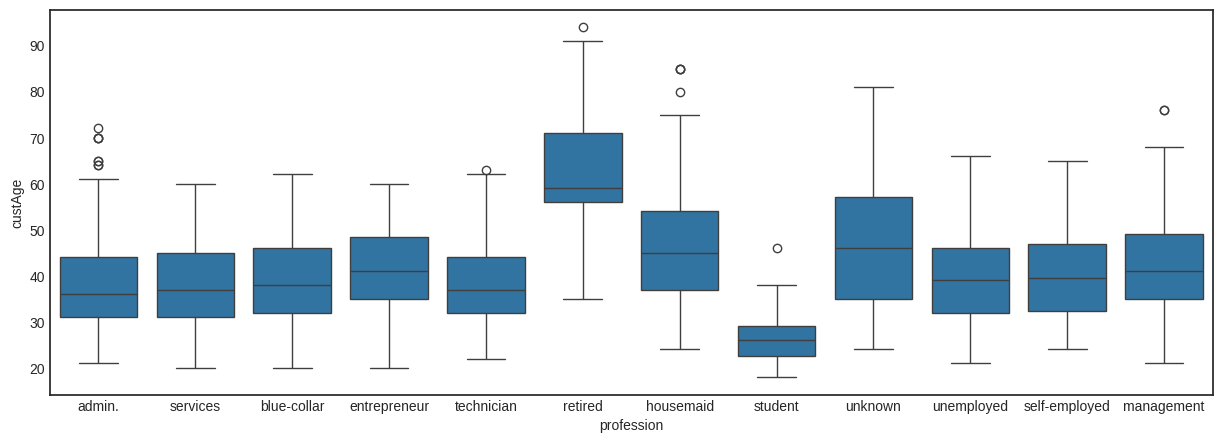

In [380]:
plt.figure(figsize=(15,5))
sns.boxplot(x='profession', y='custAge', data=df)
plt.show()

To address the missing values in the Age column, an analysis was performed to understand the relationship between Profession and Age. The analysis revealed that retired individuals have a higher average age, while students have a lower average age compared to other professions. Based on this, missing Age values will be imputed by using the mean age specific to the retired and student professions.

In [381]:
# Calculate mean age for retired, student, and other professions
mean_ages = {
    'retired': df[df['profession'] == 'retired']['custAge'].mean(),
    'student': df[df['profession'] == 'student']['custAge'].mean(),
    'other': df[~df['profession'].isin(['retired', 'student'])]['custAge'].mean()
}

# Use vectorized operations to fill missing custAge values based on profession
df['custAge'] = df.apply(
    lambda row: mean_ages['retired'] if row['profession'] == 'retired' and pd.isnull(row['custAge']) else
                mean_ages['student'] if row['profession'] == 'student' and pd.isnull(row['custAge']) else
                mean_ages['other'] if pd.isnull(row['custAge']) else row['custAge'],
    axis=1
)

Skewness: 1.01


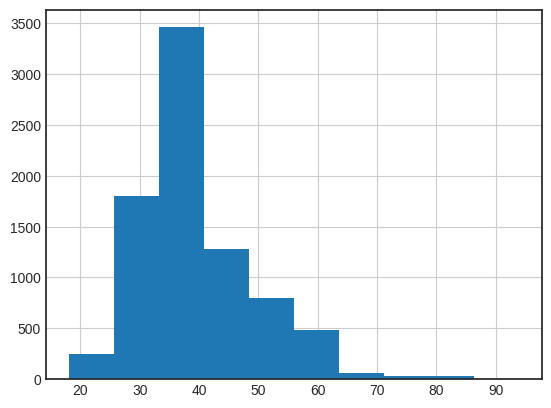

In [382]:
df['custAge'].hist()
skewness = round(df['custAge'].skew(),2)
print(f"Skewness: {skewness}")

**4.2.3 Day of the week**

There is no clear relationship observed between the 'day_of_week' column and other columns, hence the missing values will be imputed randomly. A day will be selected at random from the available days to fill the missing entries. This approach avoids making assumptions about the data while ensuring completeness in the dataset.

In [383]:
# List of days in a week
days_of_week = df['day_of_week'].dropna().unique()
days_of_week

# Replace missing values with a random day from the list
df['day_of_week'] = df['day_of_week'].apply(lambda x: random.choice(days_of_week) if pd.isnull(x) else x)

In [384]:
df['day_of_week'].value_counts()

,count
day_of_week,
mon,1761
thu,1673
tue,1623
wed,1619
fri,1526


**4.3 Handling 999 values in pdays and pmonths**

999 means that the customers are not previously contacted

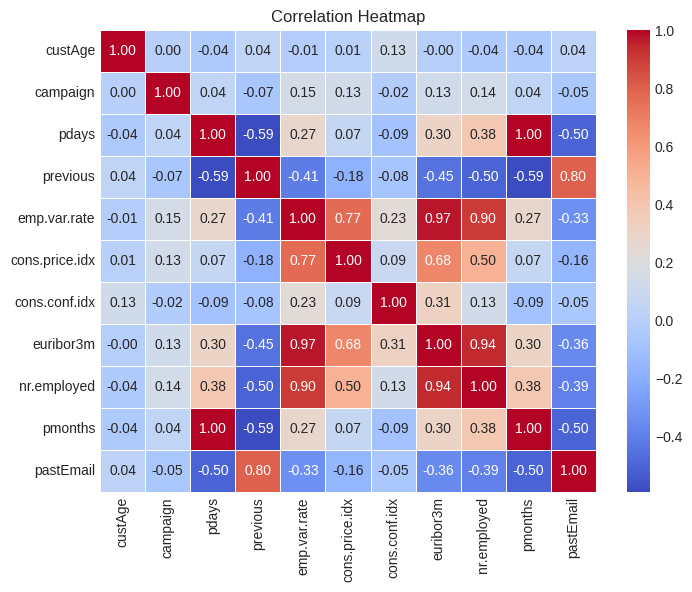

In [385]:
# Calculate correlation matrix
corr_matrix = df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

'nr.employed', 'emp.var.rate', 'euribor3m' columns are highly correlated. These columns will be treated in Feature selection.

Based on the correlation matrix, it can be observed that the pdays and pmonths columns are highly correlated. Since these two features provide similar information, we will remove one of the columns to avoid redundancy and potential multicollinearity, which could affect model performance.


In [386]:
# Remove one of the correlated columns
df = df.drop(columns=['pmonths'])

To capture whether a customer has not been contacted previously, we will create a new column called previously_contacted

In [387]:
# Create a new column 'previously_contacted' based on 'pdays'
df['previously_contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

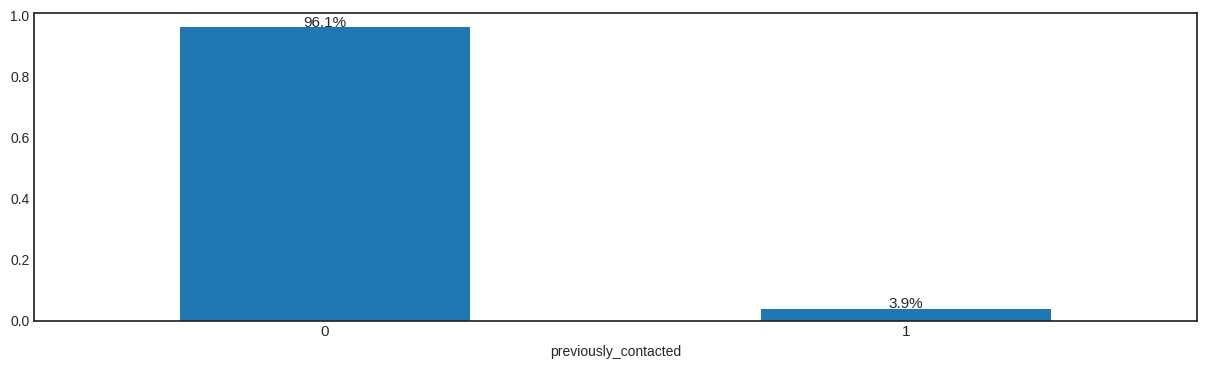

In [388]:
# plotting Bar Chart
plt.figure(figsize=(15,4))
ax = df['previously_contacted'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

The pdays column, which indicates the number of days since the client was last contacted, contains only 4% of the data marked as contacted previously. Given the sparsity of this information, it does not provide significant value for predictive modeling. Therefore, this column will be dropped to avoid unnecessary complexity in the model.

In [389]:
# Dropping pdays column due to sparsity of data
df = df.drop(columns=['pdays'])

# Step 5: Feature Engineering

In [390]:
df[cat_cols].head()

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,nonexistent,no
1,services,single,high.school,no,no,no,cellular,jul,thu,nonexistent,no
2,admin.,single,high.school,no,no,no,telephone,jun,tue,nonexistent,no
3,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,nonexistent,no
4,blue-collar,single,primary.education,unknown,yes,no,cellular,jul,tue,nonexistent,no


**5.1 Profession**

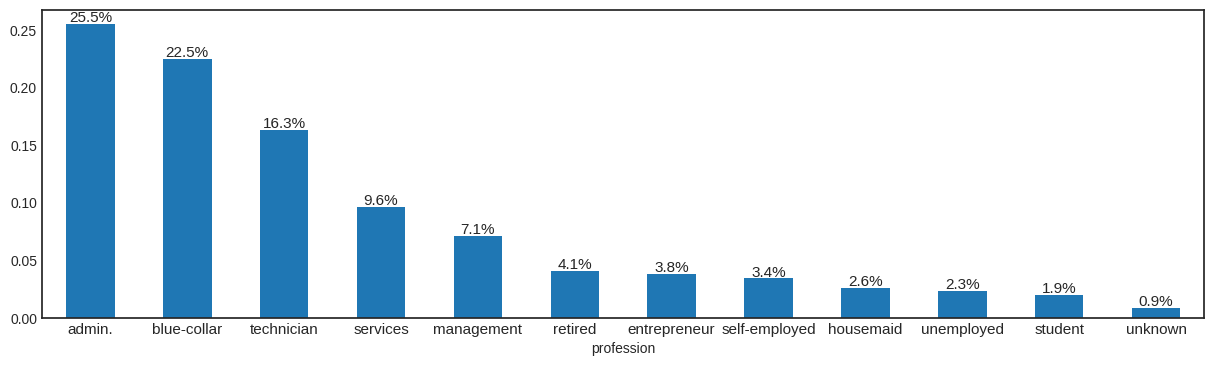

In [391]:
# plotting Bar Chart
plt.figure(figsize=(15,4))
ax = df['profession'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

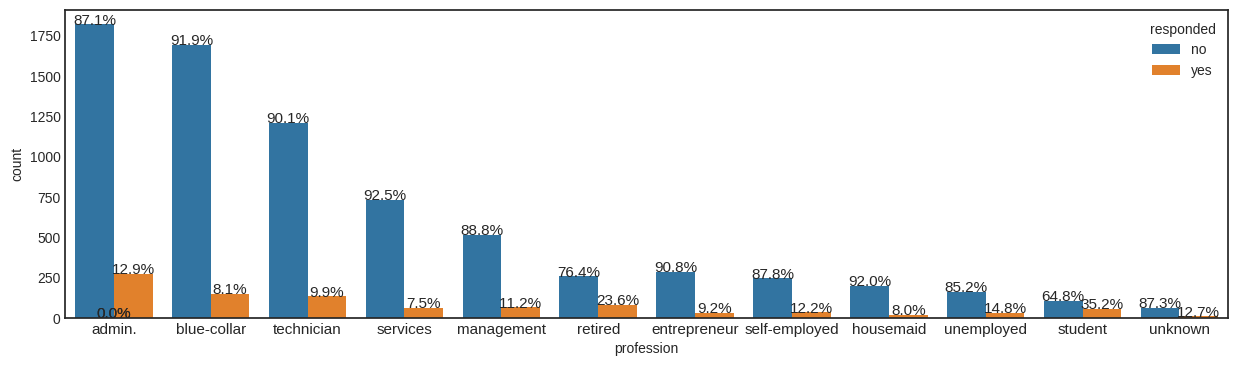

In [392]:
# Bivariate Analysis with Target column

# Get the order of categories based on value counts
profession_order = df['profession'].value_counts().index

plt.figure(figsize=(15,4))
ax = sns.countplot(x='profession', hue='responded', data=df, order=profession_order)
plt.xticks(rotation=0, fontsize=11)

# Calculate total counts per 'profession' and 'responded' combination
total_counts = pd.crosstab(df['profession'], df['responded'])

# Add percentage labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    profession_name = ax.get_xticklabels()[round(p.get_x())].get_text()  # Get the profession name based on x position

    # Calculate the total count for the current 'profession' and 'responded' combination
    total = total_counts.loc[profession_name, 'yes'] + total_counts.loc[profession_name, 'no']  # Total for that profession

    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{height/total*100:.1f}%", ha="center", fontsize=11)

plt.show()

Based on the findings from  univariate and bivariate analysis,


*   The top 5 professions account for 80% of the data, indicating that a significant portion of the dataset is concentrated in a few key professions.
*   Retired individuals and students show distinct responses to the marketing campaign.

Based on these two observations,

1.   Retired and students will be grouped into a new category called "Dependents" due to their distinct responses to the marketing campaign
2.   Other less frequent professions will be combined into an "Others" category






In [393]:
# Create a mapping for profession categories
profession_mapping = {
    'retired': 'dependents',
    'student': 'dependents',
    'entrepreneur': 'others',
    'self-employed': 'others',
    'housemaid': 'others',
    'unemployed': 'others',
    'unknown': 'others'
}

# Apply the mapping to the 'profession' column
df['profession'] = df['profession'].map(profession_mapping).fillna(df['profession'])

**5.2 Marital**

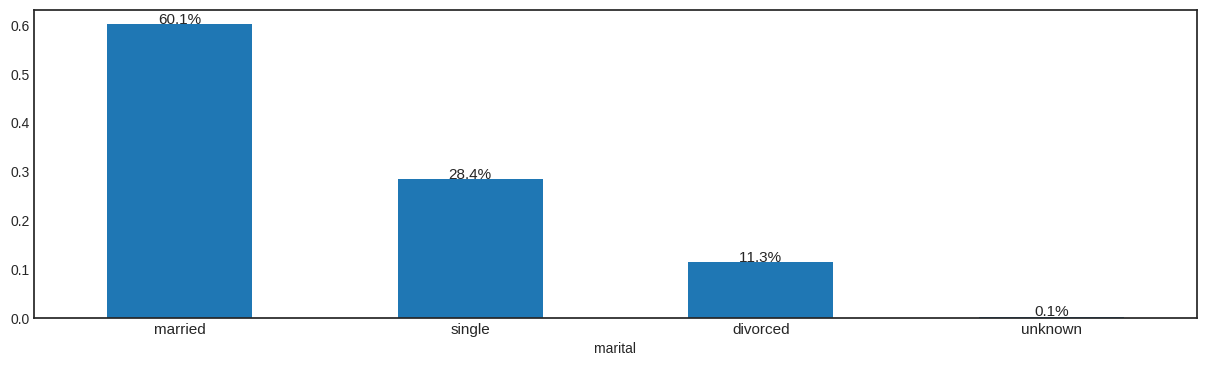

In [394]:
# plotting Bar Chart
plt.figure(figsize=(15,4))
ax = df['marital'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

The "unknown" category in the marital status column represents only 0.1% of the total records. Given its negligible size and the fact that it cannot be meaningfully grouped with other categories, these records are dropped to avoid introducing noise into the model.

In [395]:
# Drop records where marital status is 'unknown'
df = df[df['marital'] != 'unknown']

**5.3 Schooling**

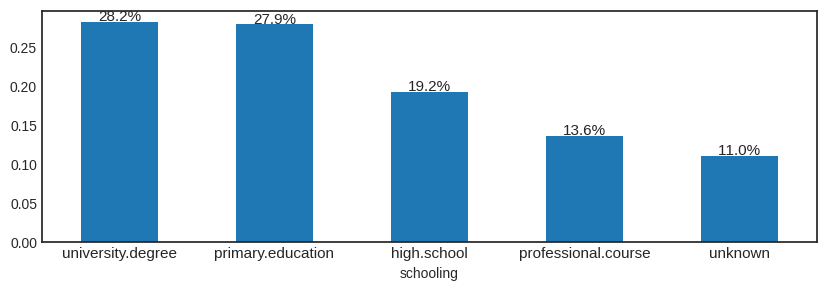

In [396]:
# plotting Bar Chart
plt.figure(figsize=(10,3))
ax = df['schooling'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

**5.4 Default**

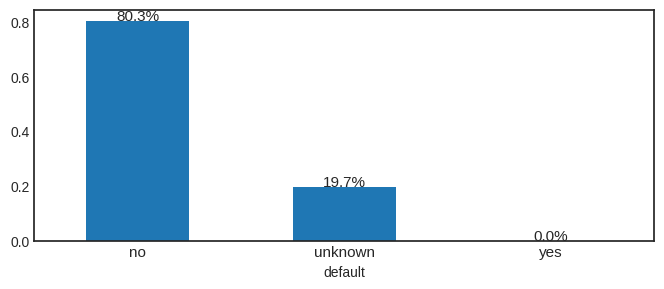

In [397]:
# plotting Bar Chart
plt.figure(figsize=(8,3))
ax = df['default'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

The "default" column contains only one record with a "yes" value, representing 0.01% of the data. To ensure meaningful analysis, this "yes" category is merged into the "unknown" category.

In [398]:
df['default'] = df['default'].replace('yes','unknown')

**5.5 Housing**

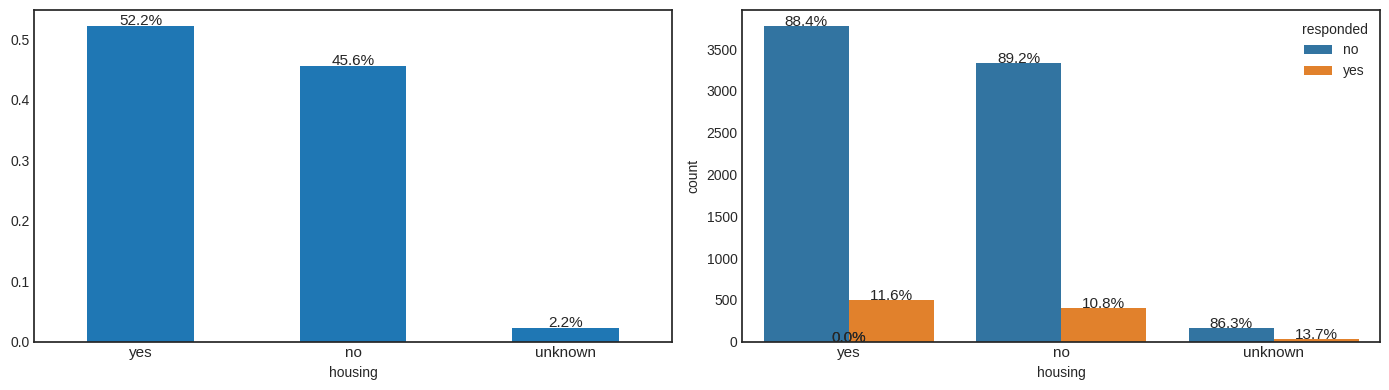

In [399]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Bar chart for 'housing' column
ax1 = axes[0]
df['housing'].value_counts(normalize=True).plot(kind="bar", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.002, f"{p.get_height() * 100:.1f}%", ha="center", fontsize=11)

# Bivariate Analysis with Target column
# Get the order of categories based on value counts
order = df['housing'].value_counts().index

ax2 = axes[1]
sns.countplot(x='housing', hue='responded', data=df, ax=ax2, order=order)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=11)

# Calculate total counts per 'housing' and 'responded' combination
total_counts = pd.crosstab(df['housing'], df['responded'])

# Add percentage labels to the top of each bar
for p in ax2.patches:
    height = p.get_height()
    category_name = ax2.get_xticklabels()[round(p.get_x())].get_text()  # Get the category name based on x position

    # Calculate the total count for the 'housing' and 'responded' combination
    total = total_counts.loc[category_name, 'yes'] + total_counts.loc[category_name, 'no']  # Total for that category

    ax2.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.002, f"{height / total * 100:.1f}%", ha="center", fontsize=11)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

The "unknown" category in the "housing" column represents 2.2% of the data. Given its small proportion, it cannot be dropped without significant data loss, and it does not align with any other categories (yes, no). Therefore, the column will be left as is for analysis.

**5.6 Loan**

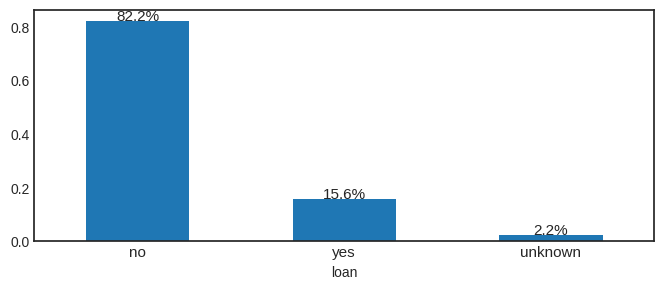

In [400]:
# plotting Bar Chart
plt.figure(figsize=(8,3))
ax = df['loan'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

No changes have been made to the "loan" column.


**5.7 Contact**

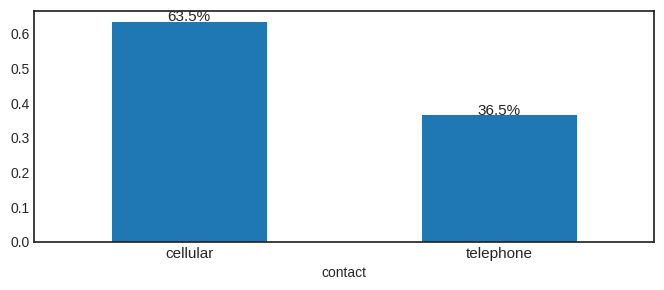

In [401]:
# plotting Bar Chart
plt.figure(figsize=(8,3))
ax = df['contact'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

No changes have been made to the "contact" column.

**5.8 Month**

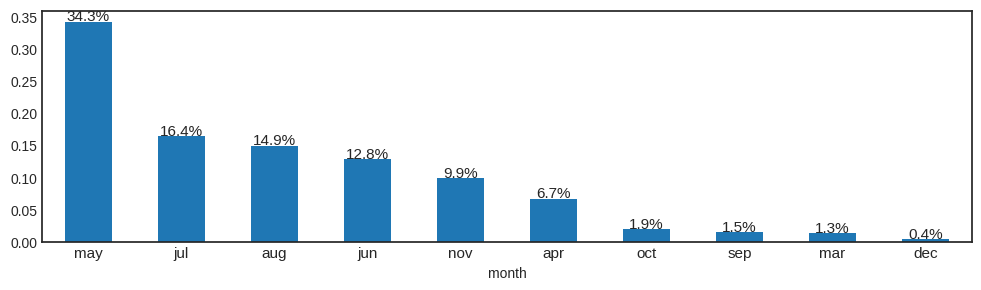

In [402]:
# plotting Bar Chart
plt.figure(figsize=(12,3))
ax = df['month'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

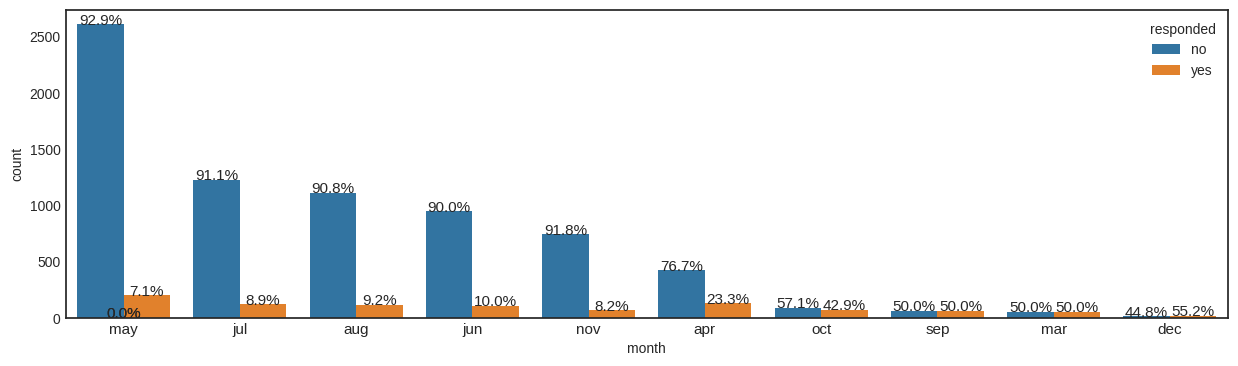

In [403]:
# Bivariate Analysis with Target column

# Get the order of categories based on value counts
order = df['month'].value_counts().index

plt.figure(figsize=(15,4))
ax = sns.countplot(x='month', hue='responded', data=df, order=order)
plt.xticks(rotation=0, fontsize=11)

# Calculate total counts per 'month' and 'responded' combination
total_counts = pd.crosstab(df['month'], df['responded'])

# Add percentage labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    category_name = ax.get_xticklabels()[round(p.get_x())].get_text()  # Get the profession name based on x position

    # Calculate the total count for the current 'month' and 'responded' combination
    total = total_counts.loc[category_name, 'yes'] + total_counts.loc[category_name, 'no']  # Total for that profession

    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{height/total*100:.1f}%", ha="center", fontsize=11)

plt.show()


*   Based on the analysis, it is observed that most of the campaigns occur during the summer months(may, jun, jul, aug) along with nov.
*   Additionally, campaigns conducted during less frequent months show a more balanced response rate, with a 50-50 split between "yes" and "no" responses.



In [404]:
# Grouping less frequent months into 'other' category

# Create a mapping for less frequent months
month_mapping = {
    'oct': 'others',
    'sep': 'others',
    'mar': 'others',
    'dec': 'others'
}

# Apply the mapping to the 'month' column
df['month'] = df['month'].map(month_mapping).fillna(df['month'])

**5.9 Day of Week**

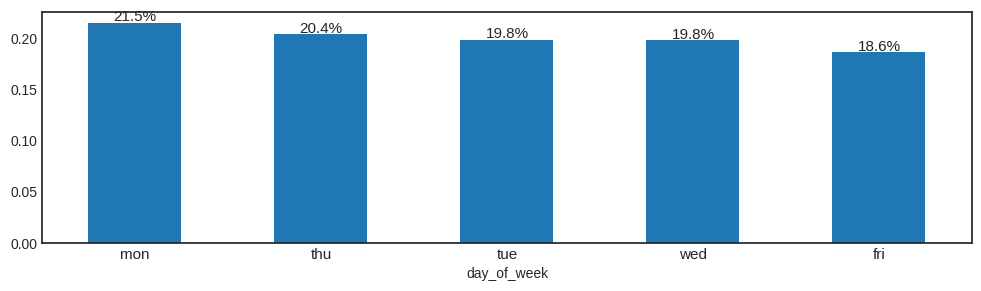

In [405]:
# plotting Bar Chart
plt.figure(figsize=(12,3))
ax = df['day_of_week'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

No changes have been made to the "day_of_week" column.

**5.10 poutcome**

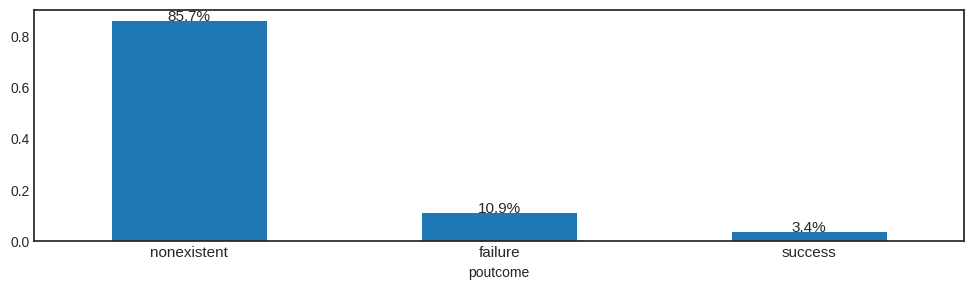

In [406]:
# plotting Bar Chart
plt.figure(figsize=(12,3))
ax = df['poutcome'].value_counts(normalize=True).plot(kind="bar")
plt.xticks(rotation= 0, fontsize=11)

# Add percentage labels to the top of bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.002, f"{p.get_height()*100:.1f}%", ha="center", fontsize=11)

plt.show()

# Step 6: Dealing with Imbalanced Data and Feature Selection

**6.1 Dealing with Skewed Data in Numerical columns**

Based on the analysis done on numerical columns, it is observed that custAge, campaign, previous and pastEmail columns are right skewed and nr.employed column is left skewed.

6.1.1 Transformation of Right Skewed Data

In [407]:
right_skew_col = ['custAge', 'campaign', 'previous', 'pastEmail']

pt = PowerTransformer(method='box-cox')

for col in right_skew_col:
  df[col+'_box'] = pt.fit_transform((df[col] + 1).values.reshape(-1, 1))

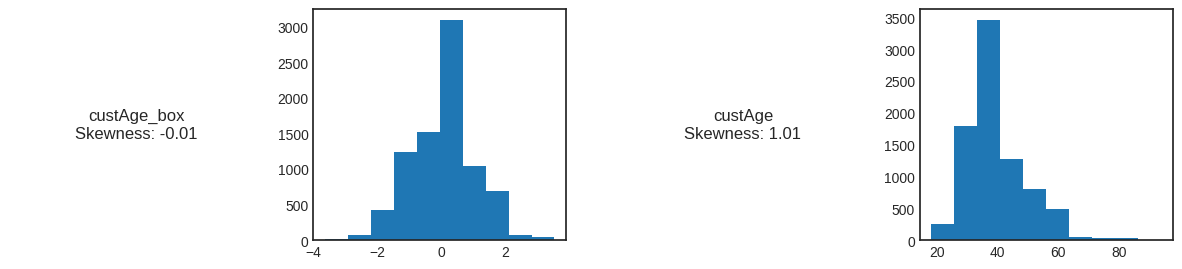

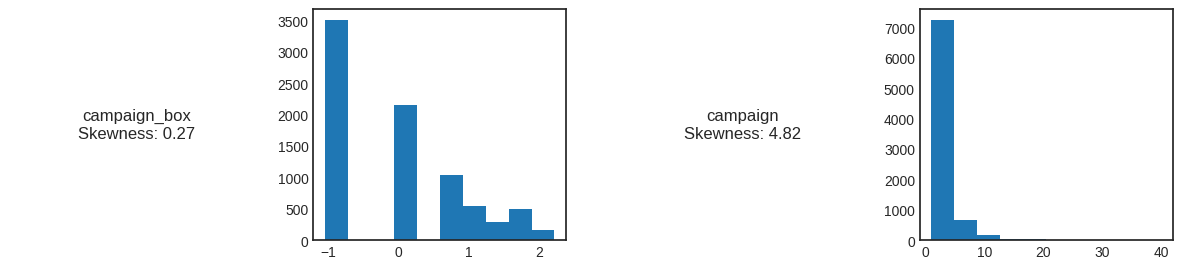

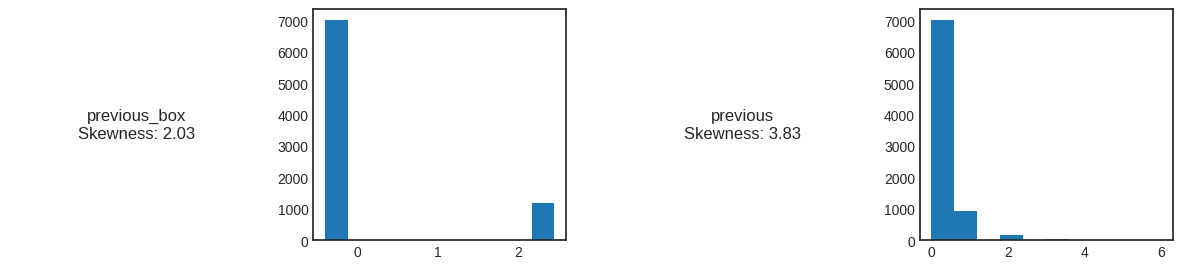

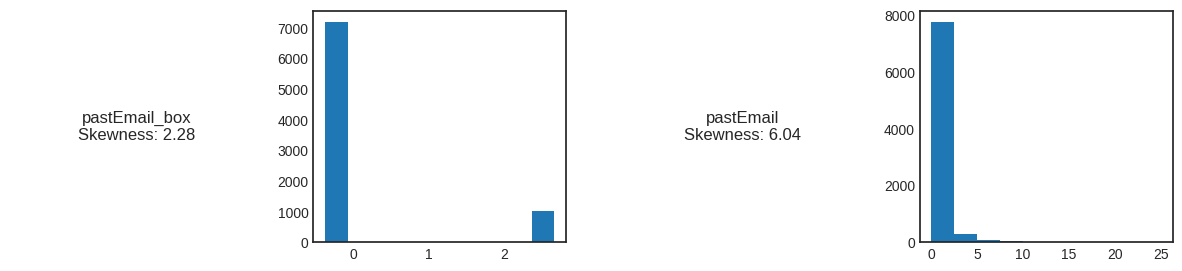

In [408]:
# Checking the skewness of transformed columns
for col in right_skew_col:
  fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3))
  # Skewness and Histogram of transformed columns
  skewness_box = round(df[col+'_box'].skew(),2)
  axes[0].text(0.5, 0.5, (f"{col+'_box'}\nSkewness: {skewness_box}"), fontsize=12, ha='center', va='center')
  axes[0].axis('off')
  axes[1].hist(df[col+'_box'])
  # Skewness and Histogram of actual columns
  skewness = round(df[col].skew(),2)
  axes[2].text(0.5, 0.5, (f"{col}\nSkewness: {skewness}"), fontsize=12, ha='center', va='center')
  axes[2].axis('off')
  axes[3].hist(df[col])
  plt.show()

In [409]:
# Dropping the actual columns and renaming transformed columns
df = df.drop(columns = right_skew_col)

for col in right_skew_col:
  df = df.rename(columns={col+'_box': col})

df.head()

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded,previously_contacted,custAge,campaign,previous,pastEmail
0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,0,-0.577980,0.256015,-0.409207,-0.376481
1,services,single,high.school,no,no,no,cellular,jul,thu,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0,-0.999330,2.196303,-0.409207,-0.376481
2,admin.,single,high.school,no,no,no,telephone,jun,tue,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,0,0.063493,-1.046201,-0.409207,-0.376481
3,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1.254595,0.256015,-0.409207,-0.376481
4,blue-collar,single,primary.education,unknown,yes,no,cellular,jul,tue,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0,0.032622,1.568621,-0.409207,-0.376481


6.1.2 Transformation of Left Skewed Data

In [410]:
df['nr.employed_square'] = df['nr.employed'].apply(lambda x: x**2)
df['nr.employed_log'] = np.log(df['nr.employed'] + 1)
df['nr.employed_sqrt'] = np.sqrt(df['nr.employed'])


print(f"Skewness of nr.employed: {round(df['nr.employed'].skew(),2)}")
print(f"Skewness of nr.employed_square: {round(df['nr.employed_square'].skew(),2)}")
print(f"Skewness of nr.employed_log: {round(df['nr.employed_log'].skew(),2)}")
print(f"Skewness of nr.employed_sqrt: {round(df['nr.employed_sqrt'].skew(),2)}")

Skewness of nr.employed: -1.02
Skewness of nr.employed_square: -1.0
Skewness of nr.employed_log: -1.04
Skewness of nr.employed_sqrt: -1.03


Despite applying transformations to address the left-skewed data, there was little change in skewness. Therefore, no transformations will be applied to the 'nr.employed' column.

In [411]:
# Dropping the transformed columns
df = df.drop(columns = ['nr.employed_square','nr.employed_sqrt','nr.employed_log'])

df.head()

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded,previously_contacted,custAge,campaign,previous,pastEmail
0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,0,-0.577980,0.256015,-0.409207,-0.376481
1,services,single,high.school,no,no,no,cellular,jul,thu,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0,-0.999330,2.196303,-0.409207,-0.376481
2,admin.,single,high.school,no,no,no,telephone,jun,tue,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,0,0.063493,-1.046201,-0.409207,-0.376481
3,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1.254595,0.256015,-0.409207,-0.376481
4,blue-collar,single,primary.education,unknown,yes,no,cellular,jul,tue,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0,0.032622,1.568621,-0.409207,-0.376481


**6.2 Encoding and Standardization**

In [412]:
# Redefining numerical and categorical columns
final_columns = df.columns
num_cols = df._get_numeric_data().columns
print(num_cols)

cat_cols = df.drop(columns=num_cols, axis=1).columns
# Dropping Target column
cat_cols = cat_cols.drop('responded')
print(cat_cols)

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'previously_contacted', 'custAge', 'campaign',
       'previous', 'pastEmail'],
      dtype='object')
Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [413]:
# Standardization of Numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[num_cols] = scaler.fit_transform(df[num_cols])

In [414]:
# One-Hot Encoding using pandas get_dummies
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
train_data_columns = df.drop(['responded'], axis=1).columns
train_data_columns

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'previously_contacted', 'custAge', 'campaign',
       'previous', 'pastEmail', 'profession_blue-collar',
       'profession_dependents', 'profession_management', 'profession_others',
       'profession_services', 'profession_technician', 'marital_married',
       'marital_single', 'schooling_primary.education',
       'schooling_professional.course', 'schooling_university.degree',
       'schooling_unknown', 'default_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_jul', 'month_jun', 'month_may', 'month_nov',
       'month_others', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

**6.3 Splitting X and y data**

In [415]:
# Define X and y
X = df.drop(['responded'], axis=1)
print(X.shape)
y = df['responded']
y = y.map(dict(yes=1, no=0))
print(y.shape)

(8192, 40)
(8192,)


**6.4 Feature Selection**

<Axes: >

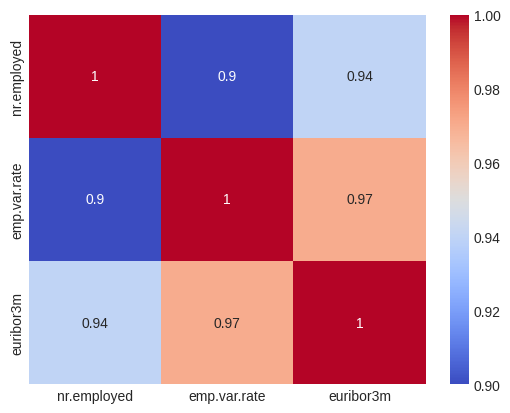

In [416]:
# While performing EDA, we observed that these columns are highly correlated
corr_check = ['nr.employed', 'emp.var.rate', 'euribor3m']

# Compute the correlation matrix
corr_matrix = round(X[corr_check].corr(),2)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [417]:
# Apply PCA
pca = PCA()  # This will compute all principal components
X_pca = pca.fit_transform(X)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio per component:", explained_variance_ratio)

# Cumulative explained variance to decide how many components to keep
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance:", cumulative_variance)

Explained variance ratio per component: [3.19643736e-01 1.11383998e-01 8.33919972e-02 7.21718034e-02
 6.62848688e-02 5.19868492e-02 3.83186844e-02 2.90419449e-02
 2.11449553e-02 1.79961370e-02 1.77451847e-02 1.73043166e-02
 1.48933680e-02 1.42594454e-02 1.40817531e-02 1.26278015e-02
 1.18204083e-02 1.00891079e-02 9.27437777e-03 8.29802748e-03
 8.07255289e-03 6.86805707e-03 6.22102720e-03 5.77232060e-03
 4.40075191e-03 4.24964958e-03 3.56111695e-03 3.27850640e-03
 3.20573620e-03 2.96559473e-03 2.68833512e-03 2.61184280e-03
 1.79194080e-03 1.32582313e-03 5.59058329e-04 2.97892750e-04
 2.41195887e-04 1.29826371e-04 5.97414438e-09 0.00000000e+00]
Cumulative explained variance: [0.31964374 0.43102773 0.51441973 0.58659154 0.6528764  0.70486325
 0.74318194 0.77222388 0.79336884 0.81136497 0.82911016 0.84641448
 0.86130784 0.87556729 0.88964904 0.90227684 0.91409725 0.92418636
 0.93346074 0.94175877 0.94983132 0.95669938 0.9629204  0.96869272
 0.97309347 0.97734312 0.98090424 0.98418275 0.987

In [418]:
pca.explained_variance_ratio_[:22].sum()

0.9566993752712953

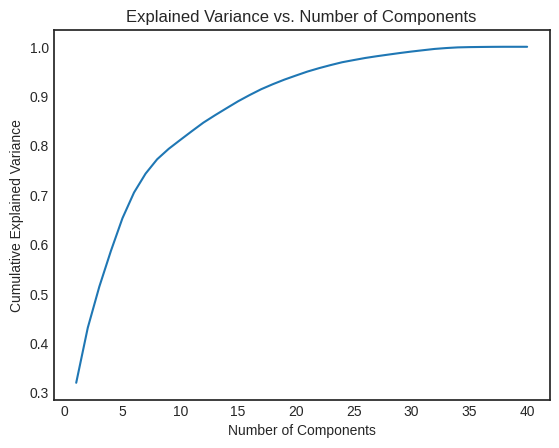

In [419]:
# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [420]:
# Choose the number of components to keep (e.g., 10)
pca = PCA(n_components=22)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the reduced data
X = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(22)])

print("Reduced Data (first few rows):")
print(X.head())

Reduced Data (first few rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.591293 -1.968252 -0.910516  0.064336  0.282494  0.391136  0.545386   
1  1.677728  0.059129 -2.046948  0.466039  1.481641 -0.257416  0.608301   
2  1.865652  0.506196 -0.348914 -0.657122 -1.170769  0.810331 -0.246856   
3  1.602637  0.346158  0.186214  1.055461 -0.507925 -0.039870  0.903201   
4  1.703940  0.188707 -1.183672  1.002038  0.651079 -0.057463  0.415838   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.717705 -0.264385 -0.336753 -0.488801  0.450286 -0.287174 -0.457923   
1 -0.388964 -0.430014 -0.026308 -0.533360 -0.100241 -0.562018  0.570689   
2 -0.915570 -0.585045 -0.281045 -0.518831 -0.223152 -0.184633 -0.410094   
3 -0.750353 -0.457941  0.287612  0.073004  0.506591 -0.255381 -0.583290   
4  0.492991 -1.374172  0.813999 -0.186786 -0.044126 -0.252455 -0.527293   

       PC15      PC16      PC17      PC18      PC19      PC20      

### Handling Imbalanced Data

The dataset used is highly imbalanced, with 88% of samples belonging to the "No" class and only 12% to the "Yes" class.

**Oversampling** the minority class may result in excessive duplication of
data, leading to potential overfitting.

**Undersampling** the majority class could lead to a loss of valuable information.

To address this, we are proceeding with **mixed sampling** using SMOTE

In [421]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE-NN for balancing the data
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance after resampling
print("Before resampling:")
print("Class distribution in training data:", np.bincount(y_train))
print("\nAfter resampling:")
print("Class distribution in resampled training data:", np.bincount(y_train_smote))

Before resampling:
Class distribution in training data: [5066  668]

After resampling:
Class distribution in resampled training data: [5066 5066]


# Step 7: Model Training

**Model Selection**

Binary classification tasks demand models that can effectively handle the nuances of the problem.


*   Logistic Regression offers a straightforward and interpretable approach, particularly effective for linearly separable data.
*   Models like Random Forest are advantageous for their ability to manage non-linear relationships and their robustness against overfitting.
*   AdaBoost, on the other hand, uses boosting to iteratively improve weak learners, making it effective at handling complex patterns, particularly in noisy data.
*   Ridge Regression, with its L2 regularization, helps prevent overfitting in high-dimensional datasets, especially when linear relationships are present.




**Metric Selection**

In evaluating the performance of a binary classification model, **accuracy** is often considered a primary metric. However, since the data is imbalanced, focusing solely on accuracy can be misleading. Metrics such as **precision** and **recall** provide a more nuanced understanding by addressing the costs associated with false positives and false negatives. Additional metrics like ROC-AUC are instrumental in offering a balanced and comprehensive evaluation.

**7.1 Defining ML models**

In [422]:
# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)
y_pred_logreg = logreg.predict(X_test)

# Random Forest Classifier model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)

# Ridge Classifier model
ridge = RidgeClassifier()
ridge.fit(X_train_smote, y_train_smote)
y_pred_ridge = ridge.predict(X_test)

# AdaBoost Classifier model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train_smote, y_train_smote)
y_pred_adaboost = adaboost.predict(X_test)

**7.2 Calculating Metrics**

In [423]:
# Calculating metrics for each model

# Defining all models in a list
model = {
        "Logistic Regression": y_pred_logreg,
        "Ridge Classifier": y_pred_ridge,
        "AdaBoost Classifier": y_pred_adaboost,
        "Random Forest Classifier": y_pred_rf
    }


# Metrics calculation
for name,y_pred in model.items():
  print(f"\n================ {name} ================\n")
  # Confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix:\n{conf_matrix}\n")

  # Accuracy
  print(f"\nAccuracy: {round(accuracy_score(y_test, y_pred),2)}\n")

  # Classification report
  clf_report = classification_report(y_test, y_pred)
  print(f"\nClassification Report:\n{clf_report}\n")

  # ROC-AUC Score
  roc_auc = roc_auc_score(y_test, y_pred)
  print(f"ROC-AUC Score: {round(roc_auc,2)}\n")



================ Logistic Regression ================

Confusion Matrix:
[[1741  459]
 [  91  167]]


Accuracy: 0.78


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2200
           1       0.27      0.65      0.38       258

    accuracy                           0.78      2458
   macro avg       0.61      0.72      0.62      2458
weighted avg       0.88      0.78      0.81      2458


ROC-AUC Score: 0.72


================ Ridge Classifier ================

Confusion Matrix:
[[1715  485]
 [  86  172]]


Accuracy: 0.77


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2200
           1       0.26      0.67      0.38       258

    accuracy                           0.77      2458
   macro avg       0.61      0.72      0.62      2458
weighted avg       0.88      0.77      0.81      2458


ROC-AUC Score: 0.72


================ A

Random Forest Classifier, with its strong performance in accuracy, F1-score, and recall, is the best model for predicting customer responses. Its high accuracy ensures reliable predictions, while the F1-score reflects a good balance between precision and recall, especially for identifying the minority class.

**7.3 Hyperparameter Tuning of Random Forest Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

  # Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters distribution to sample from
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Fit the random search
random_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Evaluate the model with the best hyperparameters
best_rf_random = random_search.best_estimator_
y_pred_rf_random = best_rf_random.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf_random))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 110}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2200
           1       0.39      0.38      0.39       258

    accuracy                           0.87      2458
   macro avg       0.66      0.66      0.66      2458
weighted avg       0.87      0.87      0.87      2458



In [424]:
# Best hyperparameters for Random Forest Classifier using RandomSearchCV
best_params = {
    'bootstrap': False,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 6,
    'n_estimators': 110
}

# Create the RandomForestClassifier with the best hyperparameters
final_model = RandomForestClassifier(**best_params)

# Fit the model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

In [425]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Accuracy
print(f"\nAccuracy: {round(accuracy_score(y_test, y_pred),2)}\n")

# Classification report
clf_report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{clf_report}\n")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {round(roc_auc,2)}\n")

Confusion Matrix:
[[2127   73]
 [ 176   82]]


Accuracy: 0.9


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2200
           1       0.53      0.32      0.40       258

    accuracy                           0.90      2458
   macro avg       0.73      0.64      0.67      2458
weighted avg       0.88      0.90      0.89      2458


ROC-AUC Score: 0.64



# Step 8: Model Deployment

**8.1 Defining function for Data Cleaning**

In [426]:
def data_cleaning(test):

  # Defining 'previous_contacted' column based on 'pdays'
  test['previously_contacted'] = test['pdays'].apply(lambda x: 0 if x == 999 else 1)

  # Selecting the final columns
  final_columns = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'previously_contacted', 'custAge', 'campaign', 'previous','pastEmail']
  test = test[final_columns]

  # Replace missing values
  # Schooling - data aggregation
  test['schooling'] = test['schooling'].replace(['basic.4y', 'basic.6y', 'basic.9y'],'primary.education')
  test['schooling'] = test['schooling'].replace('illiterate','unknown')

  # Replacing missing data using profession column
  schooling_profession_mapping = {
    'technician': 'professional.course',
    'blue-collar': 'primary.education',
    'admin.': 'university.degree',
    'services': 'high.school'}

  # Function to impute missing 'Schooling' values based on 'Profession'
  def impute_schooling(row):
      if pd.isnull(row['schooling']):
          return schooling_profession_mapping.get(row['profession'], 'unknown')
      else:
          return row['schooling']

  # Apply the function to impute missing values in 'Schooling'
  test['schooling'] = test.apply(impute_schooling, axis=1)

  # Imputing missing values for 'custAge'
  test['custAge'] = test.apply(
    lambda row: mean_ages['retired'] if row['profession'] == 'retired' and pd.isnull(row['custAge']) else
                mean_ages['student'] if row['profession'] == 'student' and pd.isnull(row['custAge']) else
                mean_ages['other'] if pd.isnull(row['custAge']) else row['custAge'],
    axis=1
  )

  # Imputing missing values for Day of week
  test['day_of_week'] = test['day_of_week'].apply(lambda x: random.choice(days_of_week) if pd.isnull(x) else x)

  return test

**8.2 Defining function for Data Preprocessing**

In [427]:
def preprocess_data(test, scaler=scaler, pt=pt, pca=pca, train_data_columns= train_data_columns, num_cols=num_cols , cat_cols=cat_cols):
    """
    Apply the same transformations to the test data as done for the training data.

    Parameters:
    - test (DataFrame): The test data to preprocess.
    - scaler (StandardScaler): The fitted StandardScaler from training data.
    - pt (PowerTransformer): The fitted PowerTransformer from training data.
    - pca (PCA): The fitted PCA transformer from training data.
    - train_data_columns (list): The list of columns from the training data.
    - num_cols (list): The list of numerical columns.
    - cat_cols (list): The list of categorical columns.

    Returns:
    - test (DataFrame): The preprocessed and PCA-transformed test data.
    """

    # 1. Apply profession mapping (using predefined mapping)
    test['profession'] = test['profession'].map({
        'retired': 'dependents',
        'student': 'dependents',
        'entrepreneur': 'others',
        'self-employed': 'others',
        'housemaid': 'others',
        'unemployed': 'others',
        'unknown': 'others'
    }).fillna(test['profession'])

    # 2. Replace 'yes' with 'unknown' in 'default' column
    test['default'] = test['default'].replace('yes', 'unknown')

    # 3. Apply month mapping (using predefined mapping)
    test['month'] = test['month'].map({
        'oct': 'others',
        'sep': 'others',
        'mar': 'others',
        'dec': 'others'
    }).fillna(test['month'])

    # 4. Apply Box-Cox transformation to numerical columns using fitted PowerTransformer
    right_skew_col = ['custAge', 'campaign', 'previous', 'pastEmail']

    for col in right_skew_col:
      test[col] = pt.transform((test[col] + 1).values.reshape(-1, 1))

    # 5. Standardize numerical columns using the fitted scaler
    test[num_cols] = scaler.transform(test[num_cols])

    # 6. Apply one-hot encoding to categorical columns
    test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

    # 7. Ensure the test data has the same columns as the training data (in case of missing categories)
    test = test.reindex(columns=train_data_columns, fill_value=0)

    # 8. Apply PCA transformation to the test data
    # Transform the test data with PCA (based on the number of components fitted during training)
    test_pca = pca.transform(test)

    # Convert PCA result to a DataFrame with column names like 'PC1', 'PC2', ..., 'PCn'
    test = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(test_pca.shape[1])])

    # Return the preprocessed test data after PCA transformation
    return test


**8.3 Creating Pipeline**

In [428]:
# Define the pipeline for data cleaning and preprocessing
data_pipeline = Pipeline([
    ('data_cleaning', FunctionTransformer(func=data_cleaning)),
    ('data_preprocessing', FunctionTransformer(func=preprocess_data)),
])

# Save the data pipeline to disk
joblib.dump(data_pipeline, 'data_pipeline.joblib')

# Save the trained model to disk
joblib.dump(final_model, 'trained_model.joblib')

['trained_model.joblib']

**8.4 Loading Test Data and Predicting**

In [429]:
test_data = pd.read_excel("/content/drive/MyDrive/Upgrad/Data sets/Capstone/test.xlsx")

In [430]:
# Load the trained model and data pipeline from disk
trained_model = joblib.load('trained_model.joblib')
data_pipeline = joblib.load('data_pipeline.joblib')

In [431]:
# Apply the preprocessing steps to the test data
processed_test_data = data_pipeline.transform(test_data)

# Predict outcomes using the trained model on the processed test data
predictions = trained_model.predict(processed_test_data)

# Add the predictions as a new column in the processed test data
processed_test_data['Prediction'] = predictions

In [433]:
# Save the processed test data with predictions to an Excel file
output_file = 'predictions_output.xlsx'
processed_test_data.to_excel(output_file, index=False)